In [293]:
import pandas as pd 
import numpy as np 
import pandas as pd 
import sys
import geopandas as gpd 
sys.path.append('/Users/gracecolverd/New_dataset')
import glob 

import matplotlib.pyplot as plt 
plt.style.use("seaborn-dark-palette")

from src.postcode_utils import load_onsud_data, load_ids_from_file

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_41721/170240363.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark-palette")


In [1]:

# ee= pd.read_csv('/Volumes/T9/Data_downloads/ONS_UPRN_database/ONSUD_DEC_2022/Data/ONSUD_DEC_2022_EE.csv')
# gas_df = pd.read_csv('/Volumes/T9/Data_downloads/UKGOV_Gas_elec/Postcode_level_gas_2022.csv')
# msoa_map = pd.read_csv('/Volumes/T9/Data_downloads/lookups/pcs_to_oa_mapping_census2021/PCD_OA_LSOA_MSOA_LAD_MAY22_UK_LU.csv', encoding='latin1')    



In [3]:
# import os 
# import glob 

# def load_proc_dir_log_file(path):
#     folder = glob.glob(os.path.join(path, '*/*csv' ) ) 
#     ful_dic = [] 
#     for x in folder:
#         df = pd.read_csv(x)
#         dic = {} 
#         region = x.split('/')[-2]
#         batch = x.split('/')[-1].split('_')[0]
#         dlen= len(df)
#         dic['path'] = x 
#         dic['region']= region 
#         dic['batch'] = batch 
#         dic['len'] = dlen 
#         dic['memory'] = 'norm'
#         ful_dic.append(dic )

#     log = pd.DataFrame(ful_dic)
#     return log 


# def replace_nulls(df):
#     df = df.replace('-999', np.nan )
#     df = df.replace(-999, np.nan )
#     df =df.replace('-333', np.nan )
#     df =df.replace(-333, np.nan )
#     df =df.replace('-888', np.nan )
#     df =df.replace(-888, np.nan )
#     return df 


# def post_process_verisk(df):
#     def create_optimal_metric(base_col, cols_to_proc, perc_build_heat):
#         for col in cols_to_proc:
#             df[f'optimal_{perc_build_heat}_{col}'] = np.where(df[col] > df[base_col], df[base_col] * perc_build_heat , df[col]  )
#         return df 

    
#     df['perc_res' ]  = df['res_total_buildings'] /  df ['all_types_total_buildings']
#     df['perc_mixed'] = df['mixed_total_buildings'] /  df ['all_types_total_buildings']
#     df['perc_cmmerl'] = df['comm_total_buildings'] /  df ['all_types_total_buildings']

#     df['perc_listed'] = df['all_types_listed_bool_total'] / df ['all_types_total_buildings']
#     df['perc_basement'] = df['all_types_base_floor_total']/  df ['all_types_total_buildings']
#     df['perc_res_listed'] = df['res_listed_bool_total'] / df ['all_types_total_buildings']

#     df ['perc_variation_res_heated_vol_inc_base'] = (df['res_heated_vol_inc_basement_FGA_total'] - df['res_heated_vol_inc_basement_EA_FGA_total']) / df['res_heated_vol_inc_basement_EA_FGA_total']
    
#     df['all_types_build_col_per_uprn'] = df['all_types_build_vol_FGA_total'] / df['res_uprn_count_total']
    
#     df['gas_per_res_heated_vol_inc_basement_EA_FGA_total'] = df['total_gas'] / df['res_heated_vol_inc_basement_EA_FGA_total']
#     df['gas_per_res_heated_vol_inc_basement_FGA_total'] = df['total_gas'] / df['res_heated_vol_inc_basement_FGA_total']
#     df['elec_per_res_heated_vol_inc_basement_EA_FGA_total'] = df['total_elec'] / df['res_heated_vol_inc_basement_EA_FGA_total']
#     df['elec_per_res_heated_vol_inc_basement_FGA_total'] = df['total_elec'] / df['res_heated_vol_inc_basement_FGA_total']

#     df['gas_per_res_heated_vol_EA_FGA_total'] = df['total_gas'] / df['res_heated_vol_EA_FGA_total']
#     df['gas_per_res_heated_vol_FGA_total'] = df['total_gas'] / df['res_heated_vol_FGA_total']
#     df['elec_per_res_heated_vol_EA_FGA_total'] = df['total_elec'] / df['res_heated_vol_EA_FGA_total']
#     df['elec_per_res_heated_vol_FGA_total'] = df['total_elec'] / df['res_heated_vol_FGA_total']

#     for perc in [0.5, 0.8]:
#         df = create_optimal_metric('res_build_vol_FGA_total'  , ['res_heated_vol_FGA_total', 'res_heated_vol_EA_FGA_total' ] , perc)
#         df = create_optimal_metric('res_build_vol_inc_basement_FGA_total'  , ['res_heated_vol_inc_basement_FGA_total', 'res_heated_vol_inc_basement_EA_FGA_total' ], perc )

#     df['gas_per_8_optimal_res_heated_col_FGA_total'] = df['total_gas'] / df['optimal_0.8_res_heated_vol_FGA_total']
#     df['gas_per_8_optimal_res_heated_col_inc_basement_FGA_total'] = df['total_gas'] / df['optimal_0.8_res_heated_vol_inc_basement_FGA_total']
    
#     return df 

# def proc_fin_df(fin_df):
#     df = fin_df.copy() 
#     df = replace_nulls(df)
#     df = post_process_verisk(df) 
#     df['outcode'] = [str(x).split(' ')[0] for x in  df.postcode] 
#     res =df[df['perc_res']==1].copy() 
#     return res 


# def load_ids_from_file(file_path):
#     with open(file_path, 'r') as file:
#         ids = file.read().splitlines()
#     return ids

In [287]:
import os
import glob
import pandas as pd
import numpy as np

# Function to load and process directory log file
def load_proc_dir_log_file(path):
    folder = glob.glob(os.path.join(path, '*/*/*csv'))
    full_dict = []  # Use more descriptive variable names
    
    for file_path in folder:
        
        df = pd.read_csv(file_path)
        df.drop_duplicates(inplace=True )
        
        # region = os.path.basename(os.path.dirname(file_path)) 
        region = file_path.split('/')[-3]
        batch = os.path.basename(file_path).split('_')[0]
        data_len = len(df)
        
        # Dictionary creation simplified
        full_dict.append({
            'path': file_path,
            'region': region,
            'batch': batch,
            'len': data_len,
            'memory': 'norm'
        })
    
    log_df = pd.DataFrame(full_dict)
    return log_df

# Function to replace specific null values with np.nan
def replace_nulls(df):
    null_values = ['-999', -999, '-333', -333, '-888', -888]
    return df.replace(null_values, np.nan)

# Function to perform post-processing
def post_process_verisk(df):

    # Create optimal metric based on certain conditions
    def create_optimal_metric(base_col, cols_to_proc, perc_build_heat):
        for col in cols_to_proc:
            optimal_col_name = f'optimal_{perc_build_heat}_{col}'
            df[optimal_col_name] = np.where(df[col] > df[base_col], df[base_col] * perc_build_heat, df[col])
        return df
    
    df['perc_res' ]  = df['res_total_buildings'] /  df ['all_types_total_buildings']
    df['perc_mixed'] = df['mixed_total_buildings'] /  df ['all_types_total_buildings']
    df['perc_cmmerl'] = df['comm_total_buildings'] /  df ['all_types_total_buildings']

    df['perc_listed'] = df['all_types_listed_bool_total'] / df ['all_types_total_buildings']
    df['perc_basement'] = df['all_types_base_floor_total']/  df ['all_types_total_buildings']
    df['perc_res_listed'] = df['res_listed_bool_total'] / df ['all_types_total_buildings']

    df ['perc_variation_res_heated_vol_inc_base'] = (df['res_heated_vol_inc_basement_FGA_total'] - df['res_heated_vol_inc_basement_EA_FGA_total']) / df['res_heated_vol_inc_basement_EA_FGA_total']

    df['res_types_build_col_per_uprn'] = df['res_build_vol_FGA_total'] / df['res_uprn_count_total']

    df['gas_per_res_heated_vol_inc_basement_EA_FGA_total'] = df['total_gas'] / df['res_heated_vol_inc_basement_EA_FGA_total']
    df['gas_per_res_heated_vol_inc_basement_FGA_total'] = df['total_gas'] / df['res_heated_vol_inc_basement_FGA_total']
    df['elec_per_res_heated_vol_inc_basement_EA_FGA_total'] = df['total_elec'] / df['res_heated_vol_inc_basement_EA_FGA_total']
    df['elec_per_res_heated_vol_inc_basement_FGA_total'] = df['total_elec'] / df['res_heated_vol_inc_basement_FGA_total']

    df['gas_per_res_heated_vol_EA_FGA_total'] = df['total_gas'] / df['res_heated_vol_EA_FGA_total']
    df['gas_per_res_heated_vol_FGA_total'] = df['total_gas'] / df['res_heated_vol_FGA_total']
    df['elec_per_res_heated_vol_EA_FGA_total'] = df['total_elec'] / df['res_heated_vol_EA_FGA_total']
    df['elec_per_res_heated_vol_FGA_total'] = df['total_elec'] / df['res_heated_vol_FGA_total']

   

    for perc in [0.5, 0.8]:
        df = create_optimal_metric('res_build_vol_FGA_total'  , ['res_heated_vol_FGA_total', 'res_heated_vol_EA_FGA_total' ] , perc)
        df = create_optimal_metric('res_build_vol_inc_basement_FGA_total'  , ['res_heated_vol_inc_basement_FGA_total', 'res_heated_vol_inc_basement_EA_FGA_total' ], perc )
    
    # Additional post-processing steps...
    df['gas_per_8_optimal_res_heated_col_FGA_total'] = df['total_gas'] / df['optimal_0.8_res_heated_vol_FGA_total']
    df['gas_per_8_optimal_res_heated_col_inc_basement_FGA_total'] = df['total_gas'] / df['optimal_0.8_res_heated_vol_inc_basement_FGA_total']
    
    return df

# Function to process and filter final DataFrame
def proc_fin_df(fin_df):
    df = replace_nulls(fin_df)
    df = post_process_verisk(df)
    df['outcode'] = df['postcode'].apply(lambda x: str(x).split(' ')[0])
    res_df = df[df['perc_res'] == 1].copy()
    return res_df

# Function to load identifiers from a file
def load_ids_from_file(file_path):
    with open(file_path, 'r') as file:
        ids = file.read().splitlines()
    return ids


In [288]:
# log = load_proc_dir_log_file('/Volumes/T9/Data_downloads/new-data-outputs/fuel (1)')
log = load_proc_dir_log_file    ('/Volumes/T9/Data_downloads/new-data-outputs/fuel (2)')

In [289]:
log.sort_values(['region', 'batch'])

,path,region,batch,len,memory
42,/Volumes/T9/Data_downloads/new-data-outputs/fu...,EE,0,10000,norm
40,/Volumes/T9/Data_downloads/new-data-outputs/fu...,EE,1,10000,norm
38,/Volumes/T9/Data_downloads/new-data-outputs/fu...,EE,10,10000,norm
32,/Volumes/T9/Data_downloads/new-data-outputs/fu...,EE,11,10000,norm
36,/Volumes/T9/Data_downloads/new-data-outputs/fu...,EE,12,10000,norm
...,...,...,...,...,...
88,/Volumes/T9/Data_downloads/new-data-outputs/fu...,YH,5,10000,norm
78,/Volumes/T9/Data_downloads/new-data-outputs/fu...,YH,6,4680,norm
81,/Volumes/T9/Data_downloads/new-data-outputs/fu...,YH,7,10000,norm
75,/Volumes/T9/Data_downloads/new-data-outputs/fu...,YH,8,10000,norm


In [305]:
test = pd.read_csv(log[(log['region']=='EM') & (log['batch']=='7')].path.values[0])

In [307]:
test

test[test['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,comm_listed_bool_total,comm_uprn_count_total,num_meters_gas,total_gas,avg_gas,median_gas,num_meters_elec,total_elec,avg_elec,median_elec
7993,S81 9JP,0.0,44.0,40761.129569,0.0,40761.129569,21526.505162,21526.505162,21526.505162,21526.505162,...,NaN,NaN,84.0,812348.766267,9670.818646,8728.668772,78.0,152301.709,1952.586013,1496.8


In [310]:
fin = [] 
fin_df=pd.DataFrame()
for x in log.path:
    
    f= pd.read_csv(x)
    # check for dups on postcode
    f.drop_duplicates(inplace=True )
    if not f[f['postcode']==pc].empty:
        print(x)
    if f.groupby('postcode').size().max()>1:
        print(x)
        print('dups')
    fin.append(f)
fin_df = pd.concat(fin)

res_df = proc_fin_df(fin_df)
res_df.dropna(axis=1, how='all' , inplace=True )

/Volumes/T9/Data_downloads/new-data-outputs/fuel (2)/EM/fuel/7_log_file.csv
/Volumes/T9/Data_downloads/new-data-outputs/fuel (2)/YH/fuel/13_log_file.csv


: 

In [309]:
pc = 'S81 9JP' 
fin_df[fin_df['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,comm_listed_bool_total,comm_uprn_count_total,total_gas,avg_gas,median_gas,num_meters_gas,total_elec,avg_elec,median_elec,num_meters_elec
7993,S81 9JP,0.0,44.0,40761.129569,0.0,40761.129569,21526.505162,21526.505162,21526.505162,21526.505162,...,NaN,NaN,812348.766267,9670.818646,8728.668772,84.0,152301.709,1952.586013,1496.8,78.0
1292,S81 9JP,0.0,2.0,2486.430042,0.0,2486.430042,1324.800000,1324.800000,1324.800000,1324.800000,...,NaN,NaN,812348.766267,9670.818646,8728.668772,84.0,152301.709,1952.586013,1496.8,78.0


In [128]:
data = fin_df.groupby('postcode').count().sort_values('num_invalid_builds')


,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,all_types_listed_bool_total,...,comm_listed_bool_total,comm_uprn_count_total,total_gas,avg_gas,median_gas,num_meters_gas,total_elec,avg_elec,median_elec,num_meters_elec
postcode,,,,,,,,,,,,,,,,,,,,,
PE37 8NE,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
PE37 8ND,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
OL10 4DA,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
PE38 9RA,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
PE38 9RD,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS8 9EB,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,2,2,2,2
TS8 9DY,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,2,2,2,2
DA5 2AQ,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2


In [296]:
p = glob.glob('/Volumes/T9/Data_downloads/new-data-outputs/batches_10k/EM/*' )
for k in p:
    d = load_ids_from_file(k)
    if pc in d:
        print(k )

/Volumes/T9/Data_downloads/new-data-outputs/batches_10k/EM/batch_7.txt


In [273]:
em_local = pd.read_csv('/Users/gracecolverd/New_dataset/test/proc_dir/fuel/EM/fuel/0_log_file.csv')
print(len(em_local))

em_hpc= pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/fuel/EM/fuel/0_log_file.csv')
em_hpc.drop_duplicates(inplace=True )

10000


In [241]:
len(em_hpc), len(em_hpc.drop_duplicates() )

(10000, 10000)

In [274]:
test = fin_df.merge(em_local, on='postcode', how='inner')

In [275]:
len(test)

10059

In [276]:
test

,postcode,num_invalid_builds_x,all_types_total_buildings_x,all_types_build_vol_FGA_total_x,all_types_base_floor_total_x,all_types_build_vol_inc_basement_FGA_total_x,all_types_heated_vol_EA_FGA_total_x,all_types_heated_vol_FGA_total_x,all_types_heated_vol_inc_basement_EA_FGA_total_x,all_types_heated_vol_inc_basement_FGA_total_x,...,comm_listed_bool_total_y,comm_uprn_count_total_y,num_meters_gas_y,total_gas_y,avg_gas_y,median_gas_y,num_meters_elec_y,total_elec_y,avg_elec_y,median_elec_y
0,PE14 7JE,0.0,1.0,6832.320389,0.0,6832.320389,3006.528905,3006.528905,3006.528905,3006.528905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PE14 7JE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PE8 6NU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PE8 6NU,0.0,2.0,3267.109947,0.0,3267.109947,1604.454475,1604.454475,1604.454475,1604.454475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE8 5BF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,NG32 1SH,0.0,6.0,15168.809798,0.0,15168.809798,7730.923408,7730.923408,7730.923408,7730.923408,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,46397.400,6628.200000,7336.9
10055,LE13 1AP,0.0,8.0,9974.649722,0.0,9974.649722,5324.039937,5324.039937,5324.039937,5324.039937,...,NaN,NaN,166421.320301,20802.665038,17594.413652,8.0,8.0,35345.760,4418.220000,3152.8
10056,NN10 0DP,0.0,39.0,26742.379712,0.0,26742.379712,13736.059923,13736.059923,13736.059923,13736.059923,...,NaN,NaN,496914.754918,12119.872071,8853.328565,41.0,45.0,106022.370,2356.052667,1752.9
10057,NN10 8PR,0.0,18.0,19846.270376,0.0,19846.270376,10753.420144,10753.420144,10753.420144,10753.420144,...,NaN,NaN,285267.298409,11410.691936,10974.035004,25.0,27.0,120812.761,4474.546704,3889.5


In [261]:
em7 = pd.read_csv('/Users/gracecolverd/New_dataset/test/proc_dir/fuel/EM/fuel/7_log_file.csv')
test = em7.merge(em_hpc, on='postcode', how='inner')

In [268]:
test = fin_df.merge(em7, on='postcode', how='inner')

In [278]:
test = test[~test['all_types_total_buildings_x'].isna()] 

test[test['all_types_total_buildings_x']!= test['all_types_total_buildings_y']][['all_types_total_buildings_x', 'all_types_total_buildings_y']]

,all_types_total_buildings_x,all_types_total_buildings_y
0,1.0,NaN
18,1.0,5.0
24,1.0,NaN
26,7.0,1.0
28,0.0,5.0
50,1.0,NaN
52,4.0,NaN
54,1.0,2.0
56,2.0,4.0
60,2.0,6.0


In [267]:
res_df[res_df['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,optimal_0.5_res_heated_vol_EA_FGA_total,optimal_0.5_res_heated_vol_inc_basement_FGA_total,optimal_0.5_res_heated_vol_inc_basement_EA_FGA_total,optimal_0.8_res_heated_vol_FGA_total,optimal_0.8_res_heated_vol_EA_FGA_total,optimal_0.8_res_heated_vol_inc_basement_FGA_total,optimal_0.8_res_heated_vol_inc_basement_EA_FGA_total,gas_per_8_optimal_res_heated_col_FGA_total,gas_per_8_optimal_res_heated_col_inc_basement_FGA_total,outcode
1292,S81 9JP,0.0,2.0,2486.430042,0.0,2486.430042,1324.8,1324.8,1324.8,1324.8,...,1324.8,1324.8,1324.8,1324.8,1324.8,1324.8,1324.8,613.185965,613.185965,S81


In [266]:
pc='S81 9JP' 

fin_df[fin_df['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,comm_listed_bool_total,comm_uprn_count_total,num_meters_gas,total_gas,avg_gas,median_gas,num_meters_elec,total_elec,avg_elec,median_elec
1292,S81 9JP,0.0,2.0,2486.430042,0.0,2486.430042,1324.8,1324.8,1324.8,1324.8,...,NaN,NaN,84.0,812348.766267,9670.818646,8728.668772,78.0,152301.709,1952.586013,1496.8


In [264]:
pc='S81 9JP' 

em7[em7['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,comm_listed_bool_total,comm_uprn_count_total,num_meters_gas,total_gas,avg_gas,median_gas,num_meters_elec,total_elec,avg_elec,median_elec
7463,S81 9JP,0.0,44.0,40761.129569,0.0,40761.129569,21526.505162,21526.505162,21526.505162,21526.505162,...,NaN,NaN,84.0,812348.766267,9670.818646,8728.668772,78.0,152301.709,1952.586013,1496.8


In [248]:
from src.postcode_utils import load_onsud_data, load_ids_from_file, get_onsud_path 
pc='S81 9JP' 
ff = glob.glob('/Users/gracecolverd/New_dataset/test/batches/EM/*') 

for f in ff:
    li = load_ids_from_file(f)
    if pc in li:
        print(f)

/Users/gracecolverd/New_dataset/test/batches/EM/batch_7.txt


In [131]:

mulit_pc = data[data['num_invalid_builds']>1 ].reset_index().postcode.tolist()

In [134]:
fin_df[fin_df['postcode'].isin(mulit_pc) ].sort_values('postcode')  

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,comm_listed_bool_total,comm_uprn_count_total,total_gas,avg_gas,median_gas,num_meters_gas,total_elec,avg_elec,median_elec,num_meters_elec
3384,B79 0HB,0.0,1.0,6377.210249,0.0,6377.210249,2479.815388,2479.815388,2479.815388,2479.815388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29748,B79 0HB,0.0,3.0,6178.660053,0.0,6178.660053,2120.267184,2120.267184,2120.267184,2120.267184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48588,BB18 6JH,0.0,1.0,2053.999925,0.0,2053.999925,1122.070233,1122.070233,1122.070233,1122.070233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31436,BB18 6JH,0.0,2.0,6539.749893,0.0,6539.749893,2568.449645,2568.449645,2568.449645,2568.449645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28189,BB18 6JY,0.0,2.0,2100.940010,0.0,2100.940010,1260.859958,1260.859958,1260.859958,1260.859958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16480,WR12 7RD,0.0,1.0,602.000027,0.0,602.000027,322.000000,322.000000,322.000000,322.000000,...,NaN,NaN,41.0,263448.158493,6425.564841,5354.836772,40.000000,92498.5,2312.4625,1641.3
28829,WR13 6JJ,0.0,6.0,6303.349977,0.0,6303.349977,3338.220021,3338.220021,3338.220021,3338.220021,...,NaN,NaN,NaN,NaN,NaN,NaN,7837.814286,5558.9,7.0000,54864.7
29612,WR13 6JJ,0.0,2.0,3598.350085,1.0,3906.270093,1294.702527,1294.702527,1602.622535,1602.622535,...,NaN,NaN,NaN,NaN,NaN,NaN,7837.814286,5558.9,7.0000,54864.7
5668,WR8 9LA,0.0,4.0,1922.189995,0.0,1922.189995,1075.249982,1075.249982,1075.249982,1075.249982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
res_df[res_df['postcode']==pc]['all_types_uprn_count_total']

31292    6.0
Name: all_types_uprn_count_total, dtype: float64

In [96]:
log[log['region']=='EM']

,path,region,batch,len,memory
4,/Volumes/T9/Data_downloads/proc_dir (1)/EM/1_l...,EM,1,50000,norm
5,/Volumes/T9/Data_downloads/proc_dir (1)/EM/2_l...,EM,2,13481,norm
6,/Volumes/T9/Data_downloads/proc_dir (1)/EM/0_l...,EM,0,50000,norm


In [111]:
ff= [] 
for path in log[log['region']=='EM'].path:
    d = pd.read_csv(path)   
    ff.append(d)

em_df = pd.concat(ff)

In [112]:
pc='S81 9JP' 

em_df[em_df['postcode']==pc]['all_types_uprn_count_total']

27463    85.0
Name: all_types_uprn_count_total, dtype: float64

In [113]:
em_res  = proc_fin_df(em_df)

In [116]:
em_res

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,optimal_0.5_res_heated_vol_EA_FGA_total,optimal_0.5_res_heated_vol_inc_basement_FGA_total,optimal_0.5_res_heated_vol_inc_basement_EA_FGA_total,optimal_0.8_res_heated_vol_FGA_total,optimal_0.8_res_heated_vol_EA_FGA_total,optimal_0.8_res_heated_vol_inc_basement_FGA_total,optimal_0.8_res_heated_vol_inc_basement_EA_FGA_total,gas_per_8_optimal_res_heated_col_FGA_total,gas_per_8_optimal_res_heated_col_inc_basement_FGA_total,outcode
0,NG22 8DS,0.0,8.0,15932.699614,0.0,15932.699614,8403.739919,8403.739919,8403.739919,8403.739919,...,8403.739919,8403.739919,8403.739919,8403.739919,8403.739919,8403.739919,8403.739919,33.814198,33.814198,NG22
1,NG22 8DG,0.0,10.0,17749.580262,0.0,17749.580262,9711.520021,9711.520021,9711.520021,9711.520021,...,9711.520021,9711.520021,9711.520021,9711.520021,9711.520021,9711.520021,9711.520021,31.631458,31.631458,NG22
3,NG22 9EJ,0.0,7.0,9207.459751,0.0,9207.459751,4900.379944,4900.379944,4900.379944,4900.379944,...,4900.379944,4900.379944,4900.379944,4900.379944,4900.379944,4900.379944,4900.379944,17.864728,17.864728,NG22
4,NG24 4QA,0.0,53.0,33466.609505,0.0,33466.609505,16916.729926,16916.729926,16916.729926,16916.729926,...,16916.729926,16916.729926,16916.729926,16916.729926,16916.729926,16916.729926,16916.729926,38.560841,38.560841,NG24
5,NG25 0QT,0.0,3.0,3312.609965,0.0,3312.609965,1664.739972,1664.739972,1664.739972,1664.739972,...,1664.739972,1664.739972,1664.739972,1664.739972,1664.739972,1664.739972,1664.739972,NaN,NaN,NG25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,NG24 4SZ,0.0,20.0,15499.309831,0.0,15499.309831,9780.059958,9780.059958,9780.059958,9780.059958,...,9780.059958,9780.059958,9780.059958,9780.059958,9780.059958,9780.059958,9780.059958,37.831185,37.831185,NG24
49995,NG22 8DN,0.0,11.0,14348.189825,0.0,14348.189825,7988.819793,7988.819793,7988.819793,7988.819793,...,7988.819793,7988.819793,7988.819793,7988.819793,7988.819793,7988.819793,7988.819793,39.567484,39.567484,NG22
49997,NG22 8EX,0.0,4.0,4433.099997,0.0,4433.099997,2148.199982,2148.199982,2148.199982,2148.199982,...,2148.199982,2148.199982,2148.199982,2148.199982,2148.199982,2148.199982,2148.199982,54.188813,54.188813,NG22
49998,NG22 8JY,0.0,7.0,7472.860010,0.0,7472.860010,3915.519951,3915.519951,3915.519951,3915.519951,...,3915.519951,3915.519951,3915.519951,3915.519951,3915.519951,3915.519951,3915.519951,35.048487,35.048487,NG22


In [115]:
em_res[em_res['postcode']==pc]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,optimal_0.5_res_heated_vol_EA_FGA_total,optimal_0.5_res_heated_vol_inc_basement_FGA_total,optimal_0.5_res_heated_vol_inc_basement_EA_FGA_total,optimal_0.8_res_heated_vol_FGA_total,optimal_0.8_res_heated_vol_EA_FGA_total,optimal_0.8_res_heated_vol_inc_basement_FGA_total,optimal_0.8_res_heated_vol_inc_basement_EA_FGA_total,gas_per_8_optimal_res_heated_col_FGA_total,gas_per_8_optimal_res_heated_col_inc_basement_FGA_total,outcode


In [106]:
d= res_df.merge(em_df, on='postcode', how='inner').copy() 
d[d['all_types_uprn_count_total_x']!=  d['all_types_uprn_count_total_y']] [['postcode', 'all_types_uprn_count_total_x', 'all_types_uprn_count_total_y']]



,postcode,all_types_uprn_count_total_x,all_types_uprn_count_total_y
0,BS7 0JN,24.0,NaN
1,BS7 9TU,40.0,NaN
1476,PE6 8EW,1.0,76.0
2183,NN29 7LD,3.0,1.0
3248,NN29 7QA,1.0,22.0
...,...,...,...
75219,B79 9HN,39.0,NaN
75220,B79 9HJ,4.0,NaN
75221,B79 0AJ,3.0,NaN
75222,DE14 3HN,65.0,NaN


In [99]:
res_df[res_df['postcode']==pc]['all_types_uprn_count_total']

31292    6.0
Name: all_types_uprn_count_total, dtype: float64

In [74]:
res_df.total_gas.isna().mean()

0.2202957488441605

In [57]:
res_df[['all_types_uprn_count_total','res_uprn_count_total','num_meters_gas', 'num_meters_elec'  ]]

,all_types_uprn_count_total,res_uprn_count_total,num_meters_gas,num_meters_elec
1,4.0,4.0,NaN,6.0
4,4.0,4.0,NaN,NaN
5,8.0,8.0,8.0,8.0
6,27.0,27.0,22.0,23.0
7,7.0,7.0,NaN,14.0
...,...,...,...,...
49993,21.0,21.0,19.0,19.0
49994,13.0,13.0,13.0,13.0
49995,3.0,3.0,NaN,NaN
49996,17.0,17.0,16.0,16.0


In [58]:
# res_df.columns

# res_df[['res_uprn_count_total', 'aåll_types_build_vol_FGA_total' ]]

# average_volume_per_uprn = ( res_df[ 'all_types_build_vol_FGA_total' ]/ res_df['res_uprn_count_total']).mean()

# std_volume_per_uprn = ( res_df[ 'all_types_build_vol_FGA_total' ]/ res_df['res_uprn_count_total']).std()

# average_volume_per_uprn, std_volume_per_uprn

In [75]:
ex = res_df[res_df['postcode']== 'S17 4GJ']['all_types_build_col_per_uprn'].values[0]

In [12]:
# import matplotlib.pyplot as plt

# # If your style file is in the root directory
# plt.style.use('/Users/gracecolverd/New_dataset/mystyle.mplstyle')

# # Or, if it's in a folder, adjust the path accordingly
# # plt.style.use('./path/to/mystyle.mplstyle')

# #

# # plt.style.use("bmh")
# import matplotlib as mpl

# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
# mpl.rcParams['font.size'] = 5


plt.style.use("seaborn-dark-palette")

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_41721/3657565747.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark-palette")


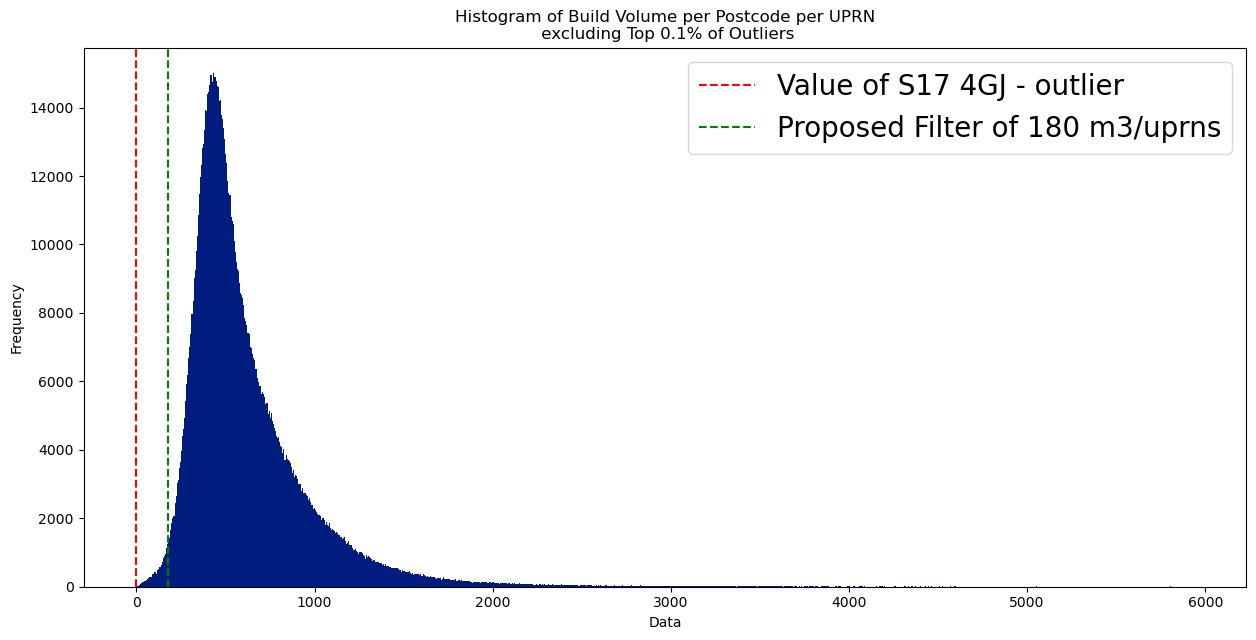

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the ratio
data = res_df['all_types_build_vol_FGA_total'] / res_df['res_uprn_count_total']

# Remove NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Determine the 99th percentile (top 1% cutoff)
percentile_99 = data.quantile(0.999)

# Exclude data points above the 99th percentile
filtered_data = data[data <= percentile_99]

# make plt fig larger
plt.figure(figsize=(15,7)) 
# Plotting the histogram
plt.hist(filtered_data, bins=1000)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Build Volume per Postcode per UPRN\n excluding Top 0.1% of Outliers')


# plot line for value of ex 
plt.axvline(x=ex, color='r', linestyle='--', label='Value of S17 4GJ - outlier') 

plt.axvline(x=180 , color='g', linestyle='--', label='Proposed Filter of 180 m3/uprns') 


# make legend larger 
plt.legend( fontsize="20") 
plt.show()


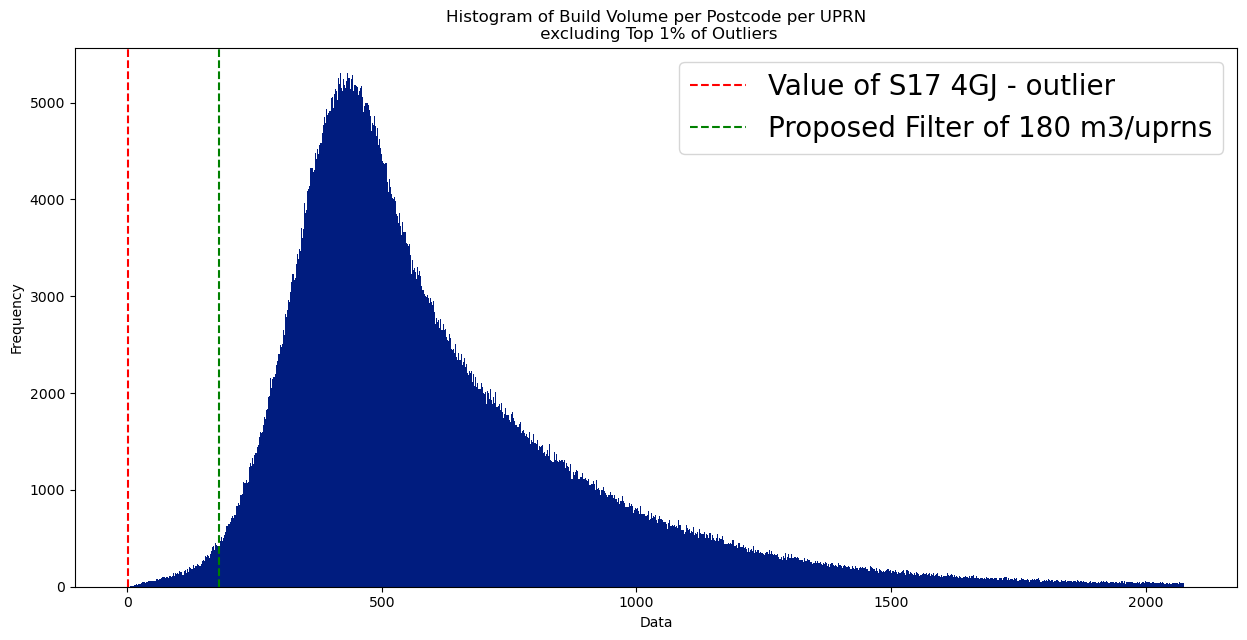

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the ratio
data = res_df['all_types_build_vol_FGA_total'] / res_df['res_uprn_count_total']

# Remove NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Determine the 99th percentile (top 1% cutoff)
percentile_99 = data.quantile(0.99)

# Exclude data points above the 99th percentile
filtered_data = data[data <= percentile_99]

# make plt fig larger
plt.figure(figsize=(15,7)) 
# Plotting the histogram
plt.hist(filtered_data, bins=1000)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Build Volume per Postcode per UPRN\n excluding Top 1% of Outliers')


# plot line for value of ex 
plt.axvline(x=ex, color='r', linestyle='--', label='Value of S17 4GJ - outlier') 

plt.axvline(x=180 , color='g', linestyle='--', label='Proposed Filter of 180 m3/uprns') 


# make legend larger 
plt.legend( fontsize="20") 
plt.show()


In [78]:
res_df.columns

Index(['postcode', 'num_invalid_builds', 'all_types_total_buildings',
       'all_types_build_vol_FGA_total', 'all_types_base_floor_total',
       'all_types_build_vol_inc_basement_FGA_total',
       'all_types_heated_vol_EA_FGA_total', 'all_types_heated_vol_FGA_total',
       'all_types_heated_vol_inc_basement_EA_FGA_total',
       'all_types_heated_vol_inc_basement_FGA_total',
       'all_types_listed_bool_total', 'all_types_uprn_count_total',
       'res_total_buildings', 'res_build_vol_FGA_total',
       'res_base_floor_total', 'res_build_vol_inc_basement_FGA_total',
       'res_heated_vol_EA_FGA_total', 'res_heated_vol_FGA_total',
       'res_heated_vol_inc_basement_EA_FGA_total',
       'res_heated_vol_inc_basement_FGA_total', 'res_listed_bool_total',
       'res_uprn_count_total', 'total_gas', 'avg_gas', 'median_gas',
       'num_meters_gas', 'total_elec', 'avg_elec', 'median_elec',
       'num_meters_elec', 'perc_res', 'perc_listed', 'perc_basement',
       'perc_res_listed', '

In [79]:
dd = res_df[res_df['all_types_uprn_count_total'] > 5].copy() 

# add filter of buildings volume per uprn 
dd= dd[dd['all_types_build_col_per_uprn'] > 180 ]

In [80]:
dd.gas_per_8_optimal_res_heated_col_inc_basement_FGA_total.describe()

count    840956.000000
mean         25.932699
std          18.847143
min           0.000101
25%           2.946319
50%          30.177685
75%          39.353156
max         613.185965
Name: gas_per_8_optimal_res_heated_col_inc_basement_FGA_total, dtype: float64

In [81]:
col = 'gas_per_8_optimal_res_heated_col_inc_basement_FGA_total'

q3 = dd[col].quantile(0.75)

top1 = dd[dd[col] > q3].copy() 

In [82]:
def top_quart(df, col='gas_per_8_optimal_res_heated_col_inc_basement_FGA_total' ):
    # col = 'gas_per_8_optimal_res_heated_col_inc_basement_FGA_total'

    q3 = df[col].quantile(0.75)

    top1 = df[df[col] > q3].copy() 
    return top1 

Text(0.5, 1.0, 'AS2: 80% Optimal heated volume, with FGA fill \n Filtering 180 vol/uprn threshold')

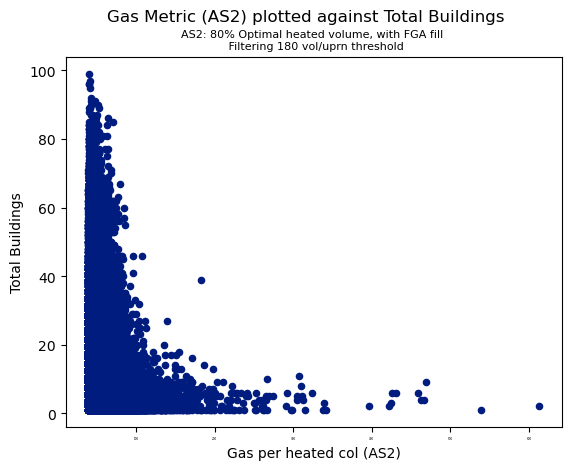

In [83]:
top1.plot(x=col, y='all_types_total_buildings', kind='scatter')
# set axes font size 

plt.xticks(fontsize=2)
# set x axislabel 
plt.xlabel('Gas per heated col (AS2)')
# set y axis label
plt.ylabel('Total Buildings')

plt.title('Gas Metric with assumption 2 plotted against Total Buildings')

# set title size 
plt.suptitle('Gas Metric (AS2) plotted against Total Buildings', fontsize=12)
# add sub title
plt.title('AS2: 80% Optimal heated volume, with FGA fill \n Filtering 180 vol/uprn threshold' , fontsize=8) 

In [84]:
top1.columns

Index(['postcode', 'num_invalid_builds', 'all_types_total_buildings',
       'all_types_build_vol_FGA_total', 'all_types_base_floor_total',
       'all_types_build_vol_inc_basement_FGA_total',
       'all_types_heated_vol_EA_FGA_total', 'all_types_heated_vol_FGA_total',
       'all_types_heated_vol_inc_basement_EA_FGA_total',
       'all_types_heated_vol_inc_basement_FGA_total',
       'all_types_listed_bool_total', 'all_types_uprn_count_total',
       'res_total_buildings', 'res_build_vol_FGA_total',
       'res_base_floor_total', 'res_build_vol_inc_basement_FGA_total',
       'res_heated_vol_EA_FGA_total', 'res_heated_vol_FGA_total',
       'res_heated_vol_inc_basement_EA_FGA_total',
       'res_heated_vol_inc_basement_FGA_total', 'res_listed_bool_total',
       'res_uprn_count_total', 'total_gas', 'avg_gas', 'median_gas',
       'num_meters_gas', 'total_elec', 'avg_elec', 'median_elec',
       'num_meters_elec', 'perc_res', 'perc_listed', 'perc_basement',
       'perc_res_listed', '

In [85]:
top1.columns

top1.gas_per_8_optimal_res_heated_col_FGA_total.describe() 

count    210239.000000
mean         48.473241
std          10.831329
min          39.353173
25%          42.182887
50%          45.792851
75%          51.404195
max         613.185965
Name: gas_per_8_optimal_res_heated_col_FGA_total, dtype: float64

In [86]:
top1[top1[col]> 500][['postcode', 'all_types_uprn_count_total', 'num_meters_gas']]

,postcode,all_types_uprn_count_total,num_meters_gas
31292,S81 9JP,6.0,84.0
30954,IG9 5TF,6.0,49.0


In [91]:
res_df.columns


Index(['postcode', 'num_invalid_builds', 'all_types_total_buildings',
       'all_types_build_vol_FGA_total', 'all_types_base_floor_total',
       'all_types_build_vol_inc_basement_FGA_total',
       'all_types_heated_vol_EA_FGA_total', 'all_types_heated_vol_FGA_total',
       'all_types_heated_vol_inc_basement_EA_FGA_total',
       'all_types_heated_vol_inc_basement_FGA_total',
       'all_types_listed_bool_total', 'all_types_uprn_count_total',
       'res_total_buildings', 'res_build_vol_FGA_total',
       'res_base_floor_total', 'res_build_vol_inc_basement_FGA_total',
       'res_heated_vol_EA_FGA_total', 'res_heated_vol_FGA_total',
       'res_heated_vol_inc_basement_EA_FGA_total',
       'res_heated_vol_inc_basement_FGA_total', 'res_listed_bool_total',
       'res_uprn_count_total', 'total_gas', 'avg_gas', 'median_gas',
       'num_meters_gas', 'total_elec', 'avg_elec', 'median_elec',
       'num_meters_elec', 'perc_res', 'perc_listed', 'perc_basement',
       'perc_res_listed', '

In [92]:
res_df[res_df['postcode']==pc]['all_types_uprn_count_total']

31292    6.0
Name: all_types_uprn_count_total, dtype: float64

In [51]:
dd[dd[col]>500][['postcode', 'all_types_build_vol_FGA_total', 'all_types_uprn_count_total', 'num_meters_gas']]

,postcode,all_types_build_vol_FGA_total,all_types_uprn_count_total,num_meters_gas
31292,S81 9JP,2486.430042,6.0,84.0
30954,IG9 5TF,2266.949927,6.0,49.0


In [42]:
def filter_range_gas_meters(df, diff = 0.2 ):
    # Calculate 80% of num_meters_gas
    lower_bound = df['num_meters_gas'] * (1- diff )

    # Calculate 120% of num_meters_gas
    upper_bound = df['num_meters_gas'] * (1 +diff )

    return  df[(df['all_types_uprn_count_total'] > lower_bound) & (df['all_types_uprn_count_total'] < upper_bound)] 

In [43]:

clean_res = filter_range_gas_meters(dd )

In [45]:
clean_res[col].describe()

count    521737.000000
mean         37.247345
std          10.228324
min           1.017303
25%          30.354673
50%          36.391776
75%          43.073504
max         314.656170
Name: gas_per_8_optimal_res_heated_col_inc_basement_FGA_total, dtype: float64

In [46]:
clean_res[clean_res[col] > 250]
# [['all_types_uprn_count_total', 'num_meters_gas']]

,postcode,num_invalid_builds,all_types_total_buildings,all_types_build_vol_FGA_total,all_types_base_floor_total,all_types_build_vol_inc_basement_FGA_total,all_types_heated_vol_EA_FGA_total,all_types_heated_vol_FGA_total,all_types_heated_vol_inc_basement_EA_FGA_total,all_types_heated_vol_inc_basement_FGA_total,...,optimal_0.5_res_heated_vol_EA_FGA_total,optimal_0.5_res_heated_vol_inc_basement_FGA_total,optimal_0.5_res_heated_vol_inc_basement_EA_FGA_total,optimal_0.8_res_heated_vol_FGA_total,optimal_0.8_res_heated_vol_EA_FGA_total,optimal_0.8_res_heated_vol_inc_basement_FGA_total,optimal_0.8_res_heated_vol_inc_basement_EA_FGA_total,gas_per_8_optimal_res_heated_col_FGA_total,gas_per_8_optimal_res_heated_col_inc_basement_FGA_total,outcode
5051,CM18 6SD,0.0,1.0,11647.280937,0.0,11647.280937,1263.620056,1263.620056,1263.620056,1263.620056,...,1263.620056,1263.620056,1263.620056,1263.620056,1263.620056,1263.620056,1263.620056,261.761628,261.761628,CM18
31054,B7 4QL,0.0,1.0,21431.849041,0.0,21431.849041,1445.550000,1445.550000,1445.550000,1445.550000,...,1445.550000,1445.550000,1445.550000,1445.550000,1445.550000,1445.550000,1445.550000,297.229515,297.229515,B7
10967,B63 2LR,0.0,1.0,18836.299133,0.0,18836.299133,1220.379944,1220.379944,1220.379944,1220.379944,...,1220.379944,1220.379944,1220.379944,1220.379944,1220.379944,1220.379944,1220.379944,314.656170,314.656170,B63


In [50]:
ee.columns

Index(['UPRN', 'GRIDGB1E', 'GRIDGB1N', 'PCDS', 'CTY21CD', 'CED21CD', 'LAD21CD',
       'WD21CD', 'PARNCP20CD', 'HLTH19CD', 'ctry22cd', 'RGN21CD', 'PCON19CD',
       'EER17CD', 'ttwa15cd', 'itl22cd', 'NPARK16CD', 'OA21CD', 'lsoa21cd',
       'msoa21cd', 'WZ11CD', 'CCG21CD', 'BUA11CD', 'BUASD11CD', 'ruc11ind',
       'oac11ind', 'lep21cd1', 'lep21cd2', 'pfa21cd', 'imd19ind'],
      dtype='object')

In [57]:
from src.utils import load_pc_shp




pc_list = ee.PCDS.unique().tolist()
onsud_filt= res_df[res_df['postcode'].isin(pc_list)].copy() 
onsud_filt['outcode'] = [str(x).split(' ')[0] for x in  onsud_filt.postcode] 

import re
def extract_letters(string):
    pattern = r'^([A-Za-z]{1,2})\d+'
    match = re.match(pattern, string)
    if match:
        return match.group(1)
    else:
        return None

# apply to column 
onsud_filt['pc_out'] = onsud_filt['outcode'].apply(extract_letters)

pcs_to_load = onsud_filt.pc_out.unique().tolist()


pc_shp = load_pc_shp(pcs_to_load=pcs_to_load)   

In [68]:
# pc_fold = '/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/*'

# ll = []
# for pc in pcs_to_load:
#     if len(pc)==1:
#         path = f'/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291/one_letter_pc_code/{pc}/{pc}.shp'
#     else:
#         path = f'/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291/two_letter_pc_code/{pc}.shp'
#     sd = gpd.read_file(path)    
#     ll.append(sd)   

# pc_shp = pd.concat(ll)

In [77]:
data = onsud_filt.merge(pc_shp, right_on ='POSTCODE', left_on='postcode' )
data = gpd.GeoDataFrame(data, geometry='geometry')

In [80]:
data.columns

Index(['postcode', 'num_invalid_builds', 'all_types_total_buildings',
       'all_types_build_vol_FGA_total', 'all_types_base_floor_total',
       'all_types_build_vol_inc_basement_FGA_total',
       'all_types_heated_vol_EA_FGA_total', 'all_types_heated_vol_FGA_total',
       'all_types_heated_vol_inc_basement_EA_FGA_total',
       'all_types_heated_vol_inc_basement_FGA_total',
       'all_types_listed_bool_total', 'all_types_uprn_count_total',
       'res_total_buildings', 'res_build_vol_FGA_total',
       'res_base_floor_total', 'res_build_vol_inc_basement_FGA_total',
       'res_heated_vol_EA_FGA_total', 'res_heated_vol_FGA_total',
       'res_heated_vol_inc_basement_EA_FGA_total',
       'res_heated_vol_inc_basement_FGA_total', 'res_listed_bool_total',
       'res_uprn_count_total', 'total_gas', 'avg_gas', 'median_gas',
       'num_meters_gas', 'total_elec', 'avg_elec', 'median_elec',
       'num_meters_elec', 'perc_res', 'perc_listed', 'perc_basement',
       'perc_res_listed', '

In [86]:
data['gas_per_8_optimal_res_heated_col_FGA_total'].isna().mean()

0.33981359610117035

<AxesSubplot: >

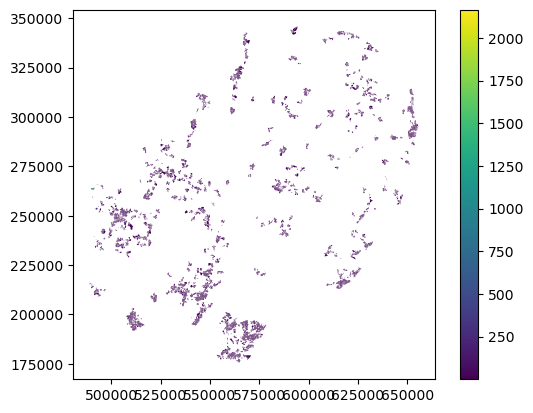

In [84]:
data.plot('gas_per_8_optimal_res_heated_col_FGA_total', legend=True)

<AxesSubplot: >

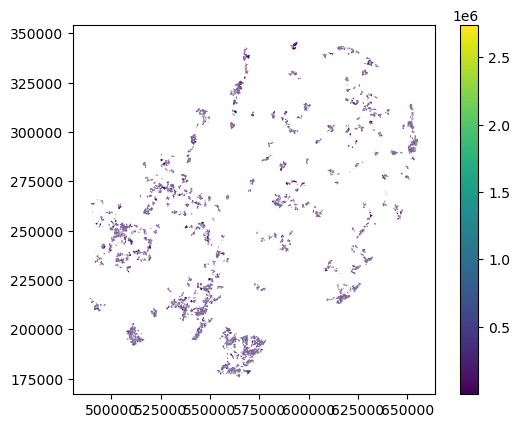

In [81]:
data.plot('total_gas', legend=True)

ValueError: Invalid vmin or vmax

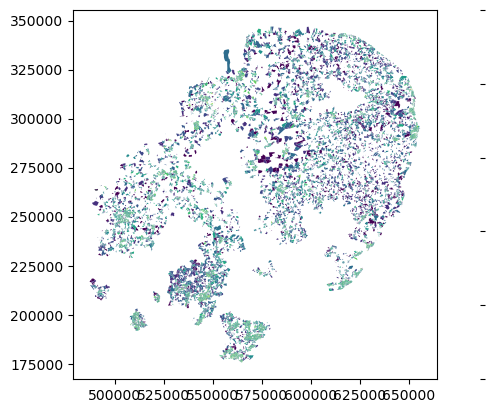

In [79]:
data.plot('all_types_total_buildings', legend=True)

In [9]:


# # # Filter rows where res_uprn_count_total is within 20% of num_meters_gas
# # filtered_df = fin_df[(fin_df['res_uprn_count_total'] >= lower_bound) & (fin_df['res_uprn_count_total'] <= upper_bound)]

# # # Display the filtered DataFrame
# # filtered_df[['all_types_uprn_count_total','res_uprn_count_total','num_meters_gas', 'num_meters_elec'  ]]

# d = proc_fin_df(filtered_df)

# from sklearn.model_selection import train_test_split

# # Split the data into train and test sets
# train_data, test_data = train_test_split(d, test_size=0.2, random_state=42)
# name = '20_perc_match_res_num_meteresgas'
# train_data.to_csv(f'{name}_train_data.csv')
# test_data.to_csv(f'{name}_test_data.csv')

,all_types_uprn_count_total,res_uprn_count_total,num_meters_gas,num_meters_elec
5,8.0,8.0,8.0,8.0
9,56.0,56.0,49.0,55.0
32,34.0,34.0,34.0,33.0
34,9.0,9.0,8.0,8.0
36,15.0,15.0,17.0,17.0
...,...,...,...,...
49991,54.0,54.0,53.0,54.0
49993,21.0,21.0,19.0,19.0
49994,13.0,13.0,13.0,13.0
49996,17.0,17.0,16.0,16.0


In [ ]:
# import ast 

# area= pd.read_csv('/Users/gracecolverd/New_dataset/data/postcode_attributes/postcode_area/EE_postcode_area.csv')
# med_age = pd.read_csv('/Users/gracecolverd/New_dataset/data/postcode_attributes/median_ageband/EE_processed.csv')
# mod_age=pd.read_csv('/Users/gracecolverd/New_dataset/data/postcode_attributes/modal_age_band/EE_log.csv')

# d = area.merge(mod_age, left_on='PCDS', right_on='postcode')
# d = d.merge(med_age, on='postcode')
# d.drop(columns=['status_x', 'status_y', 'PCDS'], inplace=True )

# d ['proc'] = d['mode_age_band, perc_missing, num_buildings'].str.replace('No buildings found', "('no buildings', 'nan', 'nan' )").str.replace('(', '[' ).str.replace(')', ']' )
# d['proc'] = [ast.literal_eval(x) for x in d['proc'] ]

# d[['mode_age_band', 'perc_missing', 'num_buildings']] =  pd.DataFrame(d['proc'].tolist(), index=d.index)

# d.drop(columns=['proc', 'geometry'], inplace=True)


: 

In [ ]:
ee_pcs = ee.PCDS.tolist() 

ee_gas = gas_df[gas_df['Postcode'].isin(ee_pcs)].copy() 

ee_gas_pc = pc_df.merge(ee_gas, left_on='POSTCODE', right_on='Postcode', how='inner')

len(ee_gas_pc), len(ee_gas)


: 

In [ ]:
def aggreagate_rs(res, col_agg):
  
  res=res[~res['total_gas'].isna()].copy() 

  # Group by 'outcode', sum 'col', and union geometries
  result = res.groupby(col_agg).agg({
      'res_build_vol_FGA_total': 'sum',
      'all_types_total_buildings': 'sum', 
        'res_heated_vol_EA_FGA_total': 'sum',
          'total_gas': 'sum',
          'optimal_0.8_res_heated_vol_FGA_total': 'sum',
      'geometry': lambda x: x.unary_union  # Union the geometries
  }).reset_index()


  result['gas_per_heated_vol_EA_FGA_total'] = result['total_gas'] / result['res_heated_vol_EA_FGA_total']
  result['gas_per_optimal_8_res_heated_vol_FGA_total'] = result['total_gas'] / result['optimal_0.8_res_heated_vol_FGA_total']
  result = gpd.GeoDataFrame(result, geometry='geometry')
  return result  

: 

In [ ]:
from src.td_plots import * 

def get_vars_plots(res):
    res['centroid_x'] = res['geometry'].centroid.x
    res['centroid_y'] = res['geometry'].centroid.y


    res['bbox'] = res['geometry'].apply(lambda x: x.bounds) 
    res['bbox_height'] = res['bbox'].apply(lambda x: x[3] - x[1] )
    res['bbox_width'] = res['bbox'].apply(lambda x: x[2] - x[0] )
    return res 

def plot_3d(result, col_plot, name ):
    # col = 'gas_per_heated_vol_EA_FGA_total'

    data= get_vars_plots(result)

    # xsize = ysize = 40000 

    sizes = np.array([(x, y, h) for x, y , h in zip( data['bbox_width'], data['bbox_height'],  data[col_plot].astype(int)) ])

    positions = np.array([(x,y, 0) for x,y in zip(data['centroid_x'], data['centroid_y'] ) ] )

    vertices, I, J, K  = triangulate_bar_faces(positions, sizes=sizes)
    X, Y, Z = vertices.T

    X, Y, Z, I, J, K

    mesh3d = go.Mesh3d(x=X, y=Y, z=Z, i=I, j=J, k=K, color="#ba2461", flatshading=True)
    print('starting layout')
    layout = go.Layout(width=650, 
                    height=900, 
                    title_text='3D Bar Chart', 
                    title_x =0.5,
                    scene=dict(
                                camera_eye_x=-1.25, 
                                camera_eye_y= 1.25,
                                camera_eye_z= 1.25)
                    
                    )
    fig = go.Figure(data=[mesh3d], layout=layout)

    import chart_studio.plotly as py

    py.iplot(fig, filename=name)
    return fig 

: 

In [ ]:
fig = plot_3d(res_ms_g, 'gas_per_optimal_8_res_heated_vol_FGA_total', 'test')

: 

In [ ]:
res_ms[res_ms['msoa11cd']=='E02005489']

: 

In [ ]:
res_ms_g.sort_values('gas_per_optimal_8_res_heated_vol_FGA_total') 

: 

In [ ]:
fig

: 

In [ ]:
from src.td_plots import * 
col = 'gas_per_heated_vol_EA_FGA_total'

data= get_vars_plots(result)
data= data[~data['Outcode'].isin(nn)]

# xsize = ysize = 40000 

sizes = np.array([(x, y, h) for x, y , h in zip( data['bbox_width'], data['bbox_height'],  data[col].astype(int)) ])

positions = np.array([(x,y, 0) for x,y in zip(data['centroid_x'], data['centroid_y'] ) ] )

vertices, I, J, K  = triangulate_bar_faces(positions, sizes=sizes)
X, Y, Z = vertices.T

X, Y, Z, I, J, K

mesh3d = go.Mesh3d(x=X, y=Y, z=Z, i=I, j=J, k=K, color="#ba2461", flatshading=True)

layout = go.Layout(width=650, 
                   height=900, 
                   title_text='3D Bar Chart', 
                   title_x =0.5,
                   scene=dict(
                              camera_eye_x=-1.25, 
                              camera_eye_y= 1.25,
                              camera_eye_z= 1.25)
                   
                  )
fig = go.Figure(data=[mesh3d], layout=layout)

import chart_studio.plotly as py

py.iplot(fig, filename='res_map')

: 

In [35]:
# export DATA_DIR='/Users/gracecolverd/New_dataset/old/testing'
# export GAS_PATH='/Volumes/T9/Data_downloads/UKGOV_Gas_elec/Postcode_level_gas_2022.csv'
# export ELEC_PATH='/Volumes/T9/Data_downloads/UKGOV_Gas_elec/Postcode_level_all_meters_electricity_2022.csv'
# export ONSUD_PATH='/Volumes/T9/Data_downloads/ONS_UPRN_database/ONSUD_DEC_2022/Data/ONSUD_DEC_2022_NE.csv'
# export PC_SHP_PATH='/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291'
# export BUILDING_PATH='/Volumes/T9/Data_downloads/Versik_building_data/2024_03_22_updated_data/UKBuildings_Edition_15_new_format_upn.gpkg'
# export MAX_WORKERS=6
# export BATCH_SIZE=10

# export ONSUD_PATH='/Volumes/T9/Data_downloads/ONS_UPRN_database/ONSUD_DEC_2022/Data/ONSUD_DEC_2022_EE.csv'


In [ ]:
data =df.sort_values('gas_per_res_heated_vol_inc_basement_EA_FGA_total', ascending=False).head(30) 

data.plot(x='postcode', y= 'gas_per_res_heated_vol_inc_basement_EA_FGA_total', kind='bar')

data.plot(x='postcode', y= 'all_types_total_buildings', kind='bar')

data.plot(x='postcode', y= 'perc_res', kind='bar')

: 

In [ ]:
df.plot(x='postcode', y= 'gas_pear_res_heated_vol_inc_basement_EA_FGA_total', kind='bar')

: 

In [ ]:
data= df[~df['res_heated_vol_inc_basement_FGA_total'].isna()].copy()  

data ['perc_variation_res_heated_vol_inc_base'] .describe() 

: 

In [ ]:
data ['perc_variation_res_heated_vol_inc_base'].sort_values()

: 

: 

In [ ]:
'all_types_build_vol_FGA_total',
'all_types_base_floor_total',
'all_types_build_vol_inc_basement_FGA_total',
'all_types_heated_vol_EA_FGA_total', 
'all_types_heated_vol_FGA_total',
'all_types_heated_vol_inc_basement_EA_FGA_total',
'all_types_heated_vol_inc_basement_FGA_total',
'all_types_listed_bool_total',

: 